# Developing Customer Churn model: a people Analytics Case Study

Source:

- Olorunwa Fagbenro, Predictive Customer Churn Analysis in Python: Uncovering Insights for Effective Retention Strategies., https://medium.com/@OlorunwaFagbenro/predictive-customer-churn-analysis-in-python-uncovering-insights-for-effective-retention-57ec8e1d55c4
- olorunwafagbenro/churnanalysis, https://github.com/olorunwafagbenro/churnanalysis/blob/main/churnmod.ipynb

## Introduction

Churn analysis or customer attrition analysis is the process of analyzing and understanding customer churn within business
 
 Churn is the rate at which customer stops using a product, service or discontinue their membership.It involves examining customer behavior, patterns and characteristics.


## Problem Definition

Understanding why and when customers are most likely to leave can lead to actions to improve customers retention. I will be usign a step-by-step systematic approach using a method that could be used for a variety of ML problems. This project would fall under what is commonly known as "**People Analytics**". <br>

In this Analysis, we will attempt to solve the following problem statement is: <br>
 - What is the likelihood of a customer leaving the company? <br>
 - What are the key indicators of a customer leaving the company? <br>
 - What strategies can be adopted based on the results to improve customer retention?

Given that we have data on former employees, this is a standard **supervised classification problem** where the label is a binary variable, 0 (active customer), 1 (former customer). In this study, our target variable Y is the probability of a customer leaving the company. <br>

## Dataset

For this case study, a customer dataset was sourced from a<a href ="https://community.ibm.com/accelerators/?context=analytics&query=telco%20churn&type=Data&product=Cognos%20Analytics"> Fictional Telecommunication company</a> providing Phone and Internet services in California in Q3 which consist of customer data for 7403 customer with various information about them. I will make use of this dataset to predict when customers are going to quit by understanding the main drivers of customer churn. <br>


## Importing Python libaries

In [1]:
!pip install plotly
!pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.8 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.8 -m pip install --upgrade pip


In [2]:
from pandas import read_excel
import seaborn as sns
import pandas as pd
import numpy as np
import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

# Common sklearn Model Helpers
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

### Importing the data

> Let's import the dataset and make of a copy of the source file for this analysis. <br> The dataset contains 7403 rows and 23 columns.

In [3]:
# Read Excel file
df_sourcefile = pd.read_excel('data/Telco_customer_churn.xlsx', sheet_name='Telco_Churn', header=0,)
# df_sourcefile = pd.read_excel('data/Telco_customer_churn.xlsx')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (7043, 33)


In [4]:
# Make a copy of the original sourcefile
df_telco = df_sourcefile.copy()

## Exploratory Data Analysis and Visualizations

>In this section, we will provide data visualizations that summarizes or extracts relevant patterns, characteristics and features in our dataset. Let's look at each column in detail, get a better understanding of the dataset, and group them together when appropriate.

In [5]:
#dataset columns
df_telco.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
#datatypes
df_telco.columns.to_series().groupby(df_telco.dtypes).groups

{int64: ['Count', 'Zip Code', 'Tenure Months', 'Churn Value', 'Churn Score', 'CLTV'], float64: ['Latitude', 'Longitude', 'Monthly Charges'], object: ['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges', 'Churn Label', 'Churn Reason']}

In [7]:
#dataset view
df_telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


The dataset contains several numerical and categorical columns providing various information on customer details

In [8]:
#'Total Charges' column appears as object so i converted to float
df_telco['Total Charges'] = pd.to_numeric(df_telco['Total Charges'],errors='coerce').fillna(0)

In [9]:
# Columns datatypes and missign values
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### Numerical Feature Overview

In [10]:
#data statistics
df_telco.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


AttributeError: 'SubplotSpec' object has no attribute 'is_first_col'

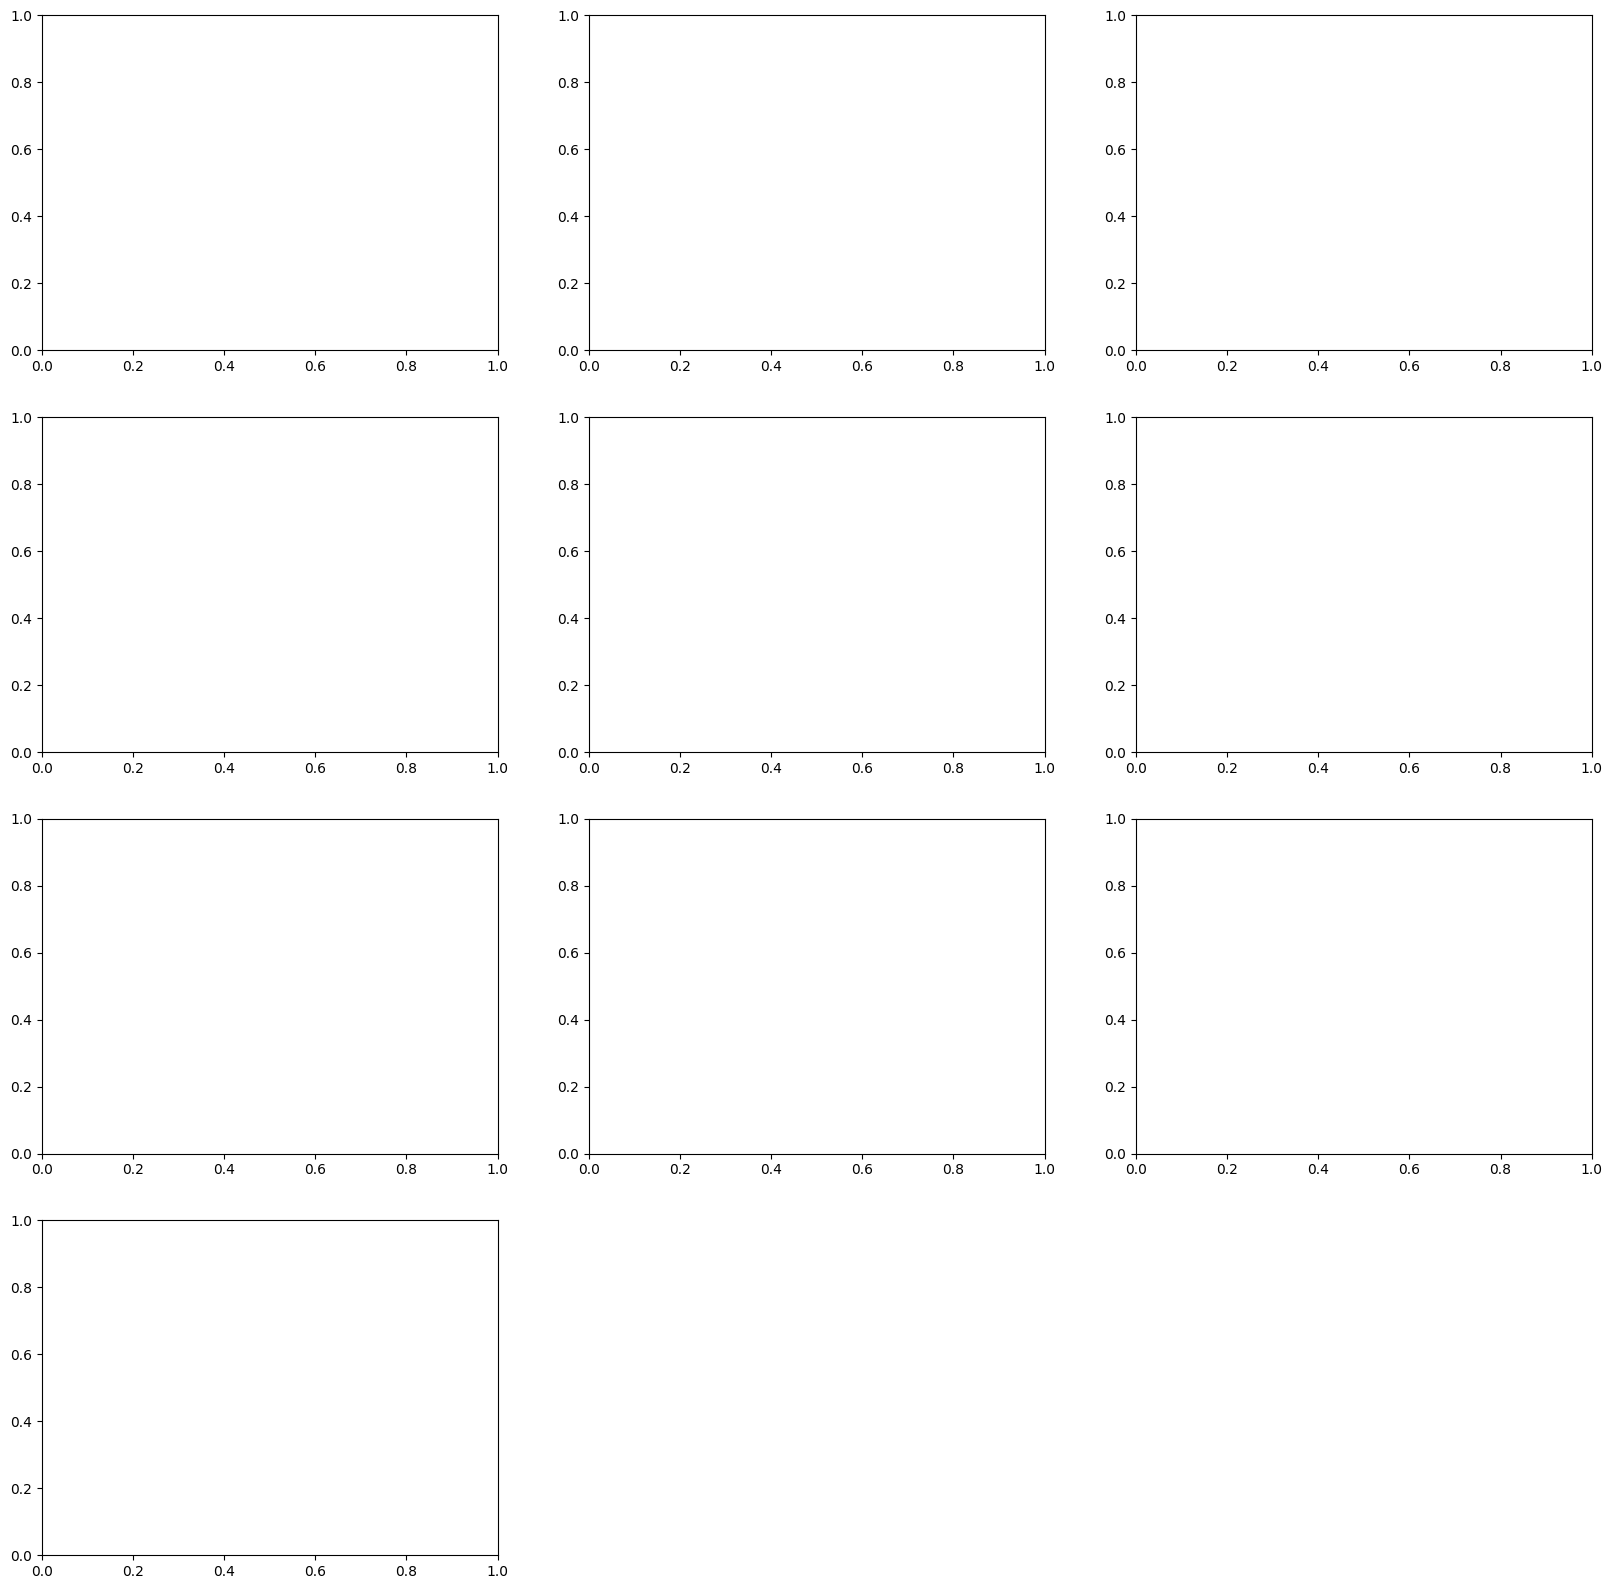

In [11]:
#hsitogram plots for numerical values
df_telco.hist(figsize=(20,20))
plt.show()

### Categorical Features by target Variable

### Gender Distribution

In [12]:
#gender counts
genchurn_counts =df_telco['Gender'].value_counts()
genchurn_counts

Gender
Male      3555
Female    3488
Name: count, dtype: int64

In [13]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_telco[(df_telco['Churn Label'] == 'Yes') & (
    df_telco['Gender'] == 'Male')].shape[0] / df_telco[df_telco['Gender'] == 'Male'].shape[0])*100, (df_telco[(df_telco['Churn Label'] == 'Yes') & (df_telco['Gender'] == 'Female')].shape[0] / df_telco[df_telco['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 26.2%; Female 26.9%.


In [14]:
print("Normalised gender distribution of current-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_telco[(df_telco['Churn Label'] == 'No') & (
    df_telco['Gender'] == 'Male')].shape[0] / df_telco[df_telco['Gender'] == 'Male'].shape[0])*100, (df_telco[(df_telco['Churn Label'] == 'No') & (df_telco['Gender'] == 'Female')].shape[0] / df_telco[df_telco['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of current-employees in the dataset: Male = 73.8%; Female 73.1%.


<AxesSubplot:title={'center':'Leavers by Gender (%)'}, xlabel='Gender'>

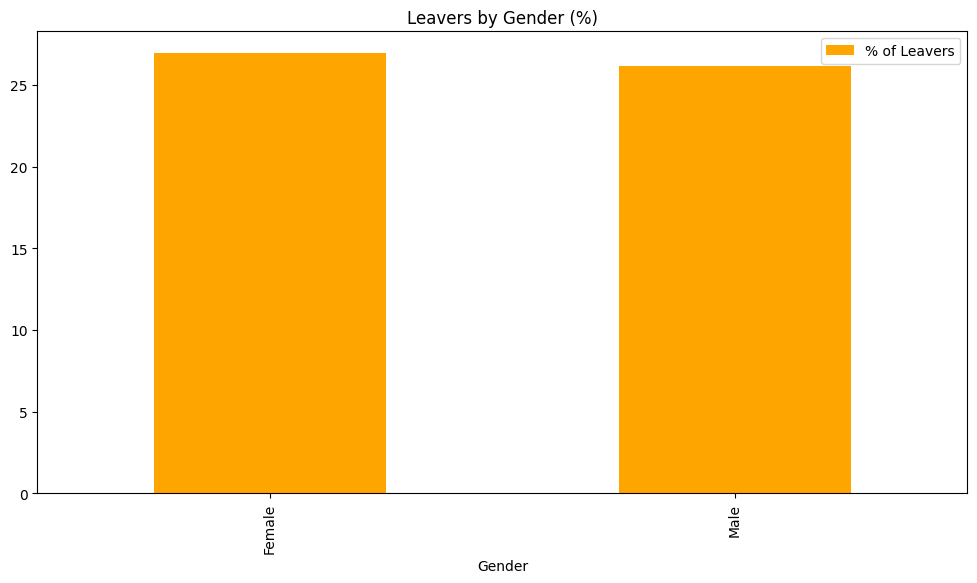

In [15]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df_telco['Gender'].unique()):
    ratio = df_telco[(df_telco['Gender']==field)&(df_telco['Churn Label']=="Yes")].shape[0] / df_telco[df_telco['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="Gender").sum()
df_G.plot(kind='bar', color='orange',title='Leavers by Gender (%)')

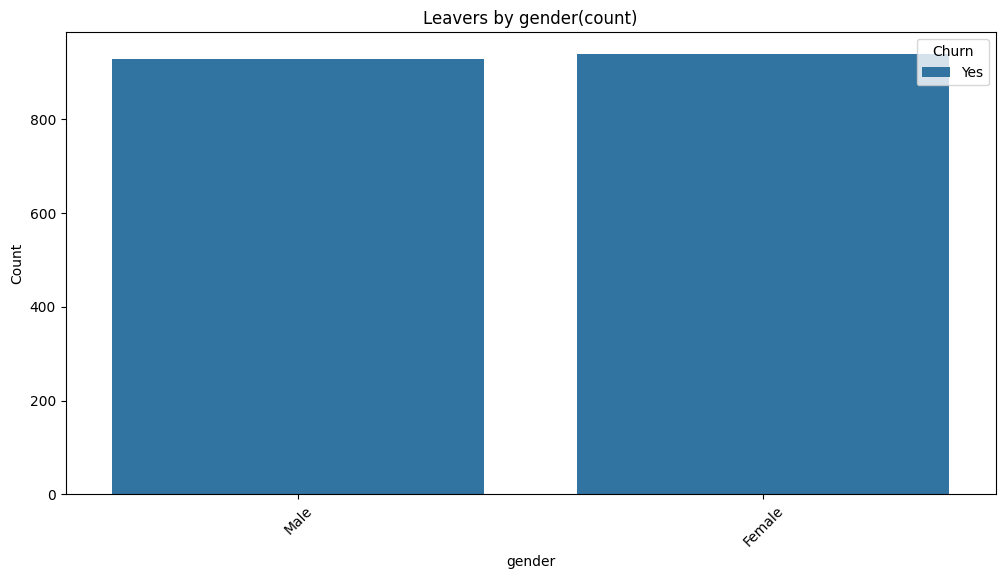

In [16]:
sns.countplot(x='Gender', hue='Churn Label', data=df_telco[df_telco['Churn Label'] == 'Yes'])
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Leavers by gender(count)')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

### Internet Service Distribution

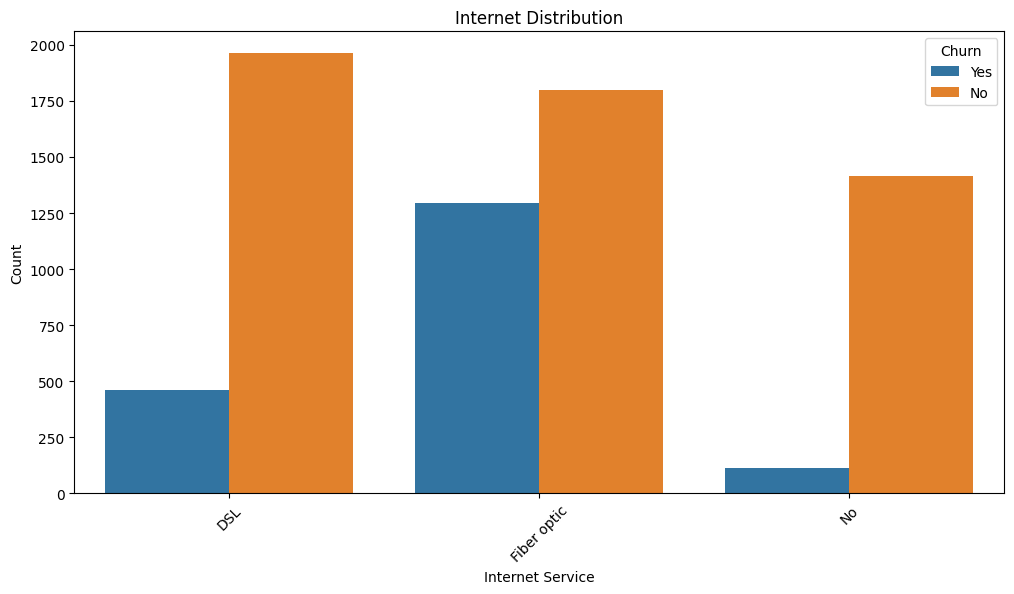

In [17]:
sns.countplot(x='Internet Service', hue='Churn Label', data=df_telco)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Internet Distribution')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

### Churned Customers by Contract type

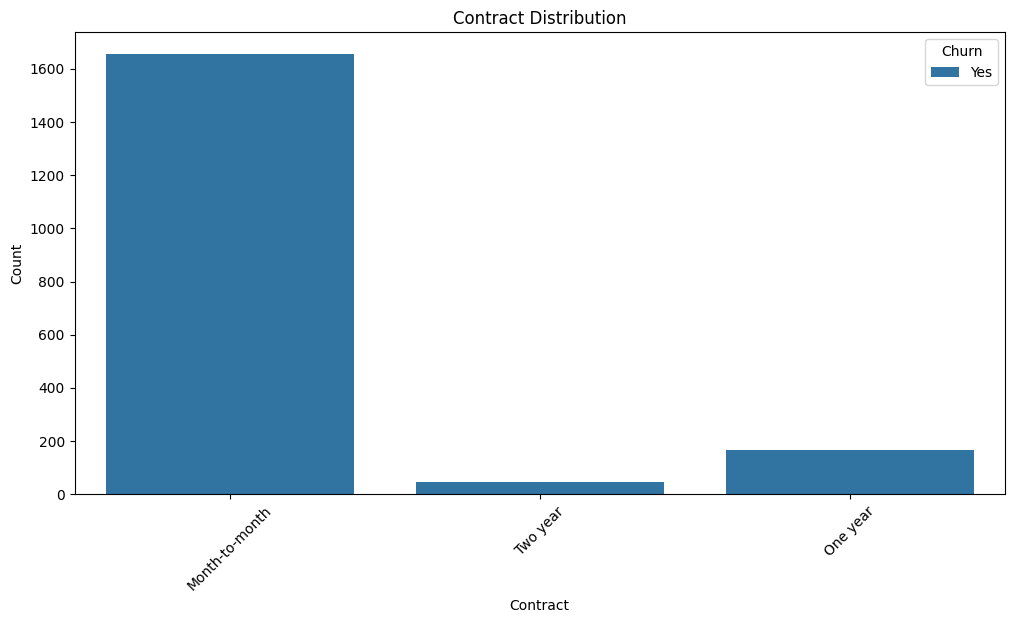

In [18]:
sns.countplot(x='Contract', hue='Churn Label', data=df_telco[df_telco['Churn Label'] == 'Yes'])
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Contract Distribution')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

### Payment Method Distribution

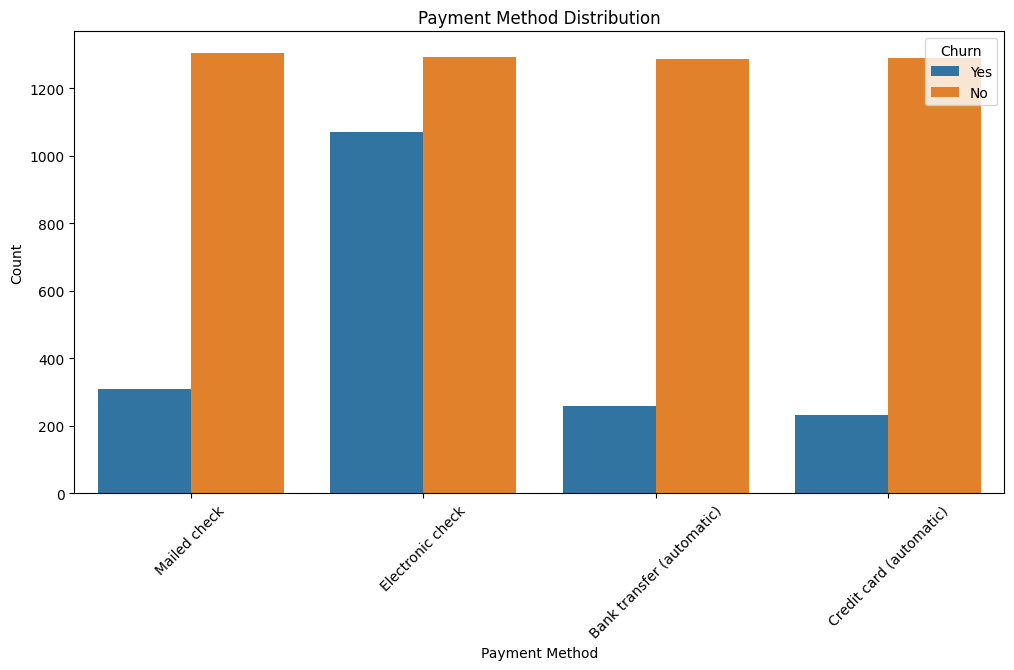

In [19]:
sns.countplot(x='Payment Method', hue='Churn Label', data=df_telco)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

### Tech Support

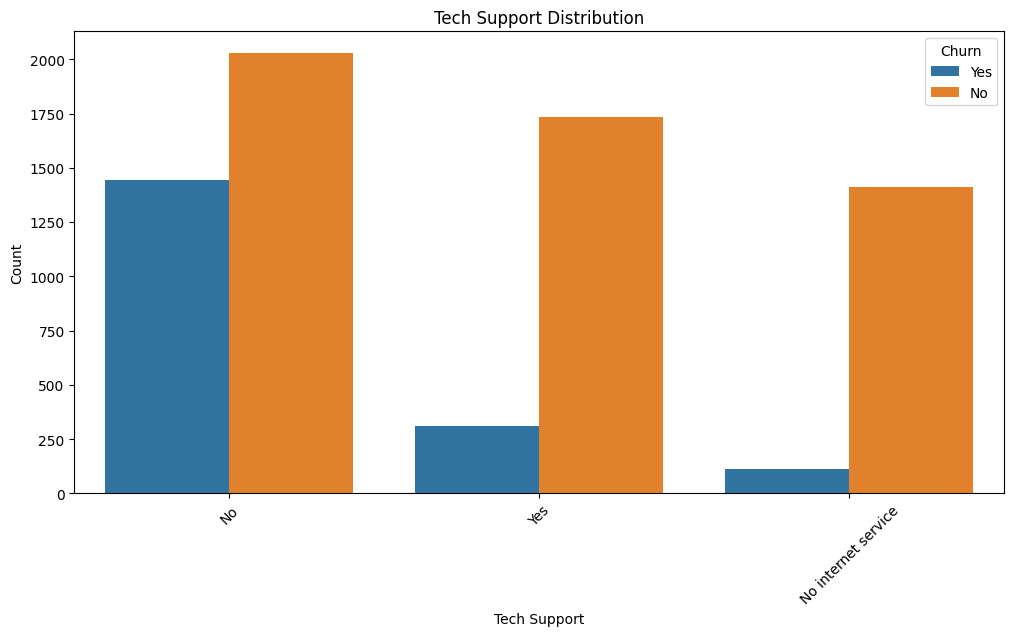

In [20]:
sns.countplot(x='Tech Support', hue='Churn Label', data=df_telco)
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.title('Tech Support Distribution')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

### Partner Distribution

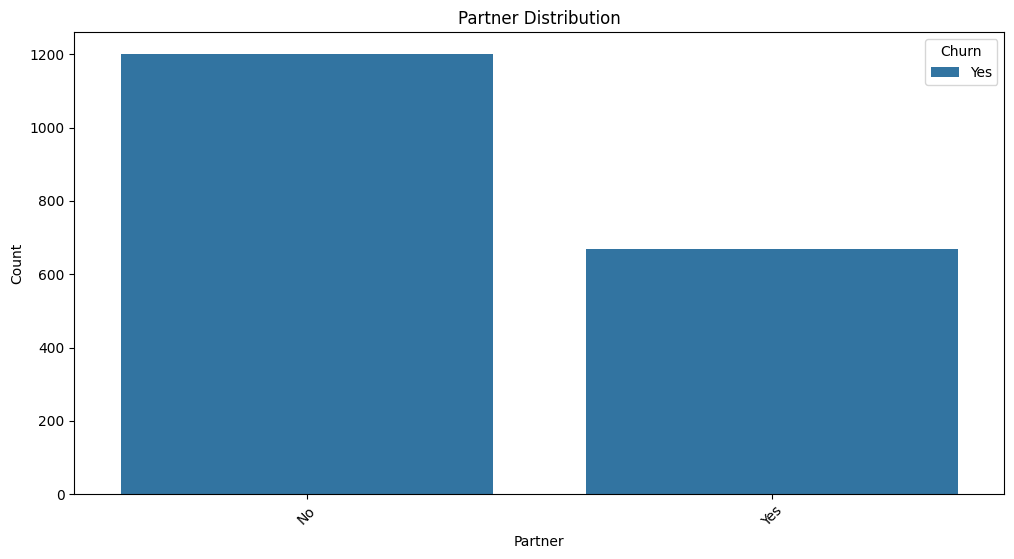

In [21]:
sns.countplot(x='Partner', hue='Churn Label', data=df_telco[df_telco['Churn Label'] == 'Yes'])
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Partner Distribution')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

### Senior Citizen Distribution

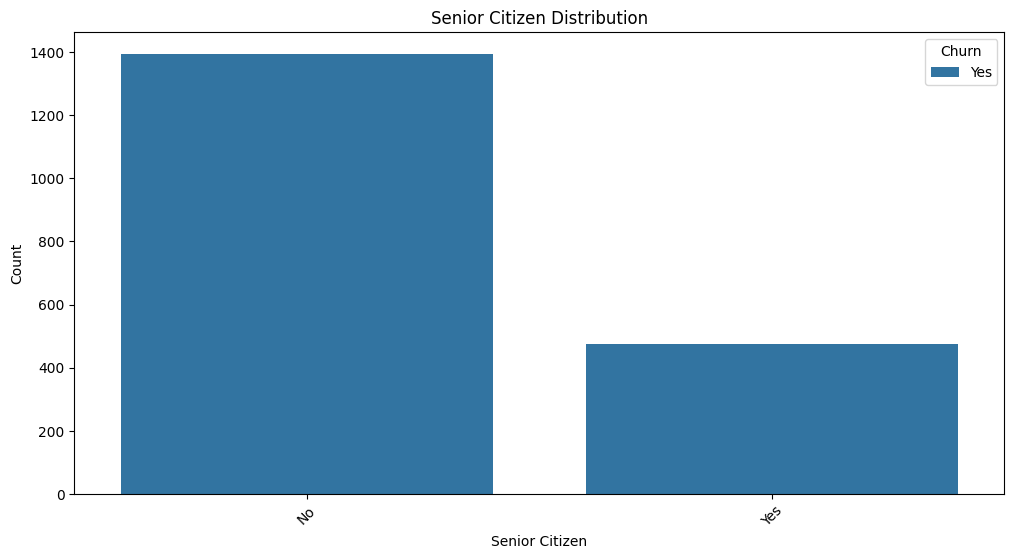

In [22]:
sns.countplot(x='Senior Citizen', hue='Churn Label',data=df_telco[df_telco['Churn Label'] == 'Yes'])
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Senior Citizen Distribution')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

### Dependants Distribution 

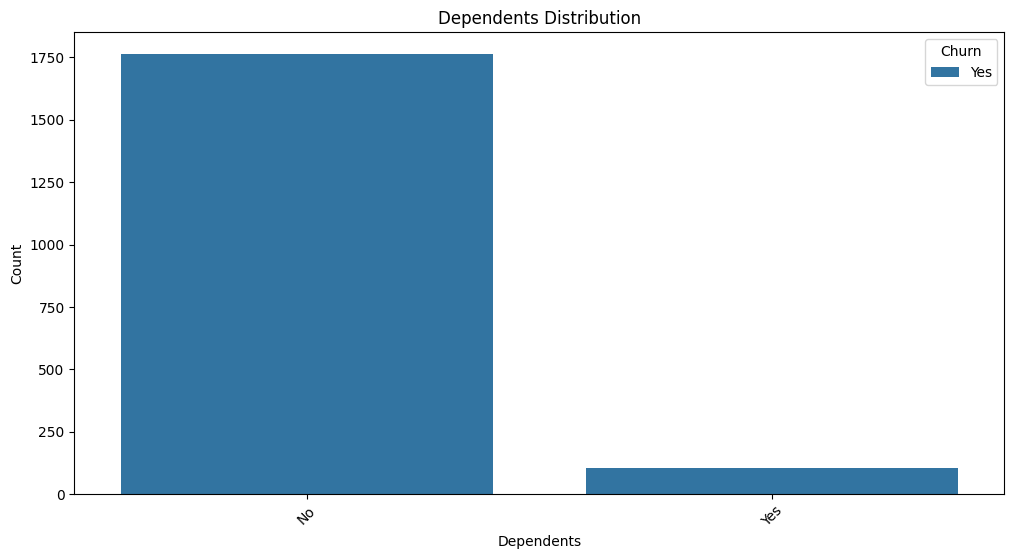

In [23]:
sns.countplot(x='Dependents', hue='Churn Label', data=df_telco[df_telco['Churn Label'] == 'Yes'])
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependents Distribution')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

## Target Variable: Churn

>The feature 'Churn value' is what this Machine Learning problem is about. We are going to predict the value of the variable 'Churn value' by using other related features associated with the customer's details and history.

In [24]:
# Churn Label indicates if the employee is currently active ('No') or has left the company ('Yes')
df_telco['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

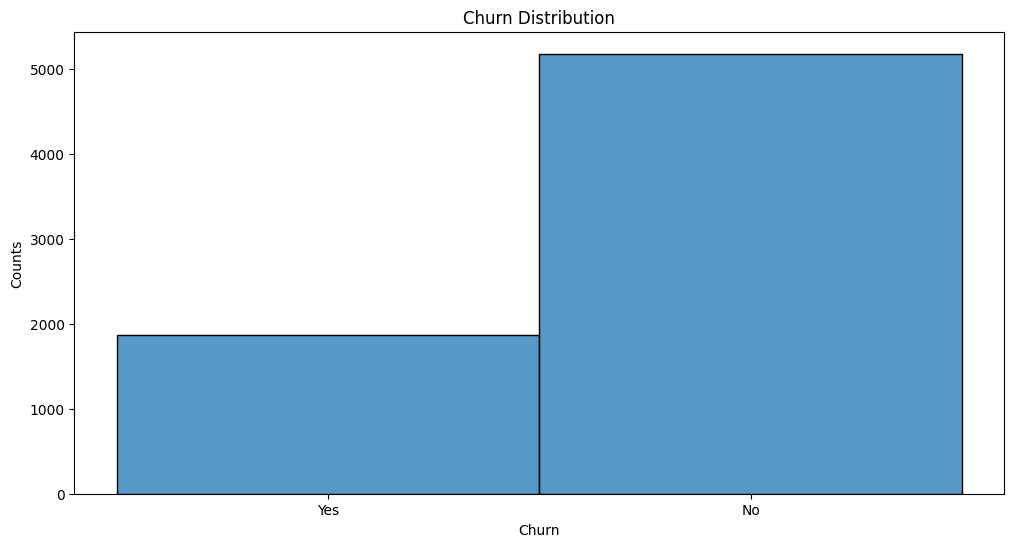

In [25]:
sns.histplot(data=df_telco['Churn Label'])  # Set kde=False to exclude the kernel density estimation curve

# Customize the plot if needed
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Counts")

In [26]:
print("Percentage of Current customers is {:.1f}% and of Ex-customers(Churned) is: {:.1f}%".format(
    df_telco[df_telco['Churn Label'] == 'No'].shape[0] / df_telco.shape[0]*100,
    df_telco[df_telco['Churn Label'] == 'Yes'].shape[0] / df_telco.shape[0]*100))

Percentage of Current customers is 73.5% and of Ex-customers(Churned) is: 26.5%


>from the chart above, we see this is an imbalanced class problem. whereas, the percentage of Current customers in our dataset is <b>73.5.9%</b> and the percentage of Ex-customer is: <b>26.5%</b>

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

## Correlation

Correlation refers to the statistical relationship or association between two or more variables. It quantifies the degree to which variables change together or how they are related to each other. Correlation measures the strength and direction of the linear relationship between variables.

>Now lets take a look at the correlations between variables

In [27]:
# Find correlations with the target and sort
df_HR_trans = df_telco.copy()
df_HR_trans['Target'] = df_HR_trans['Churn Label'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Churn Label', 'Count', 'Country', 'Churn Score', 'Churn Value','CustomerID','State','City'], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

ValueError: could not convert string to float: '33.964131, -118.272783'

In [28]:
df_telco.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [29]:
#Checking correlation between data points 
correlation_matrix = df_HR_trans.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '33.964131, -118.272783'

### Exploratory data analysis summary

#### Some Data Patterns and findings noticed Includes;

> The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
- The strongest positive correlations with the target features are: **Monthly Charges**, **latitude**, **Zip code**<br>
- Several features (i.e columns) are redundant for our analysis, namely: Count, CustomerID, State, City,etc. 

###  Insights
- The data shows equal distribution of churned customers by Gender with 50.2% Male and 49% female. . 
- There is a trend that customers who churned were more likely to be on a Month-to-Month contract (88.5%) type compared to other</br> contract type namely one year(9%), Two years(2.57%). The implication is that there is something about this contract type that is correlated with churn. Maybe it is easier to break a Month-to-Month contract?
- 57% of Churned Customers uses **Electronic Check** payment method
- Customers who uses fibre optic internet services churned the most with 70% counts of the total data
- Single employees show the largest proportion of leavers,1200 compared to those with partner 669
- From the data 78% showed customers churned due to no online security
- 64% of churned customer does not subscribes to an additional device protection plan for their Internet equipment provided by the company

## Data Pre-Processing

### Data label Encoding
> Data Encoding refers to the process of converting data from one format or representative to another.It involves transforming the data into a standardized format that could be easily be interpreted by the implemented algorithm


Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values, I will use both label encoding and one-hot Encoding(transforming categorical data to binary vectors).

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Creating label encoder object
le = LabelEncoder()

In [31]:
#dropping redundant features from the dataset
df = df_telco.drop(['CustomerID','Count','Country','Lat Long','City','State',
                   'Zip Code','Longitude', 'Latitude','Churn Reason','Churn Label','Churn Score','CLTV'], axis=1)

In [32]:
df.shape

(7043, 20)

In [33]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [34]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [35]:
df_encoded.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,1,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,1,8,1,1,99.65,820.50,1,...,False,False,True,False,True,False,False,False,True,False
3,0,0,1,1,28,1,1,104.80,3046.05,1,...,True,False,True,False,True,False,False,False,True,False
4,1,0,0,1,49,1,1,103.70,5036.30,1,...,False,False,True,False,True,False,False,False,False,False


## Splitting data into training and testing sets

> For implementation of any Machine Learning algorithm, we must decouple training and testing datasets from our master dataframe

In [36]:
# Split the data into features (X) and target variable (y)
# assign the target to a new dataframe and convert it to a numerical feature
X = df_encoded.drop(['Churn Value'], axis=1)
y = df_encoded['Churn Value']

In [37]:
# assign the target to a new dataframe and convert it to a numerical feature
target= y.copy()

In [38]:
# Split the data into training and testing sets
#Since there is a class imbalance in the datasets(73% not churned and 27% churned customers),
#we use stratify=y to maintain the same ratio of the training datasets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=1,stratify=y)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (5634, 30)
y_train dataset:  (5634,)
X_test dataset:  (1409, 30)
y_test dataset:  (1409,)


In [39]:
df_encoded.shape

(7043, 31)

## Feature Scaling

> It is genearally recommended to use feature scaling to ensure optimal model performance.
for this analysis and due to the nature of my data,<br/>I will be using the **Standardization scaling**, this method transform the features such that they have zero mean and unit variance

In [40]:
#Initialise the StandardScaler
scaler = StandardScaler()

In [41]:
#fitting the scaler to the training data
scaler.fit(X_train)

StandardScaler()

In [42]:
#Applying Standardization to the training and the test dataset
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled

array([[-1.00533907, -0.43544401,  1.03541553, ..., -0.52820558,
         1.42044902, -0.54987075],
       [-1.00533907, -0.43544401,  1.03541553, ..., -0.52820558,
        -0.70400274, -0.54987075],
       [ 0.99468929, -0.43544401, -0.96579583, ..., -0.52820558,
        -0.70400274, -0.54987075],
       ...,
       [ 0.99468929, -0.43544401, -0.96579583, ..., -0.52820558,
         1.42044902, -0.54987075],
       [ 0.99468929,  2.2965065 ,  1.03541553, ..., -0.52820558,
         1.42044902, -0.54987075],
       [-1.00533907, -0.43544401, -0.96579583, ..., -0.52820558,
         1.42044902, -0.54987075]])

## Developing Machine Learning Model

> For this analysis, we will be implementing the **Logistic Regression Model** which is a statistical modeling technique used to predict the probability of a binary outcome based on one or more independent variables. It is commonly used when the dependent variable is categorical and has only two possible outcomes, often referred to as "success" and "failure," "yes" and "no," or "1" and "0."

In logistic regression, the goal is to model the relationship between the independent variables (also known as predictors or features) and the probability of the binary outcome. It estimates the probability using a logistic function, also called the sigmoid function, which maps any real-valued input to a value between 0 and 1.

In [44]:
# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

In [45]:
# Fit the model to the training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [46]:
# Predict churn for the test set
y_pred = logreg.predict(X_test_scaled) #log_opt.predict(X_test_scaled)

## Model Evaluation

Text(0.5, 533.5555555555555, 'Predicted label')

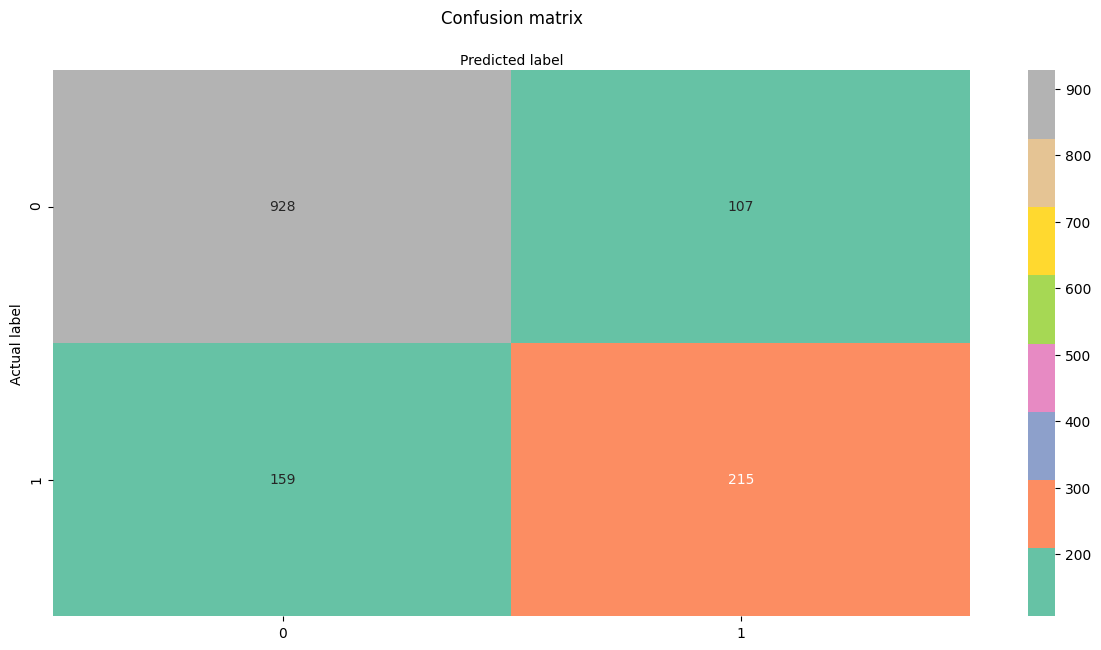

In [47]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
plt.xticks(tick_marks, names)
plt.yticks(tick_marks, names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Set2" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.07)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> The Confusion matrix is telling us that we have 928+215 correct predictions and 159+107 incorrect predictions. In other words, an accuracy of 81.12%

In [48]:
print('Accuracy of Logistic Regression Classifier on test set is: {:.2f}%'.format(logreg.score(X_test_scaled, y_test)*100))

Accuracy of Logistic Regression Classifier on test set is: 81.12%


In [49]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8112136266855926


In [50]:
#Area under the curve score(AUC)
logreg.fit(X_train_scaled, y_train) # fit optimised model to the training data
prob = logreg.predict_proba(X_test_scaled) # predict probabilities
prob = prob[:, 1] #  keep probabilities associated with the customers leaving
log_roc_auc = roc_auc_score(y_test, prob) # calculate AUC score using test dataset
print('AUC score: %.3f' % log_roc_auc)

AUC score: 0.853


> The AUC score represents how well the classifier can distinguish between Churned Customers and acive customers. A value of 0.5 would indicate that the classifier performs no better than random guessing, while a value of 1 would mean a perfect classifier. The calculated AUC score is 0.85, it suggests that the classifier can correctly rank 85% of randomly chosen churned customers higher than randomly chosen active customers.

In [51]:
# Classification report for the optimised Log Regression
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.67      0.57      0.62       374

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.81      0.81      1409



> These metrics provide insights into different aspects of the classifier's performance


Instead of getting binary estimated target features (0 or 1), a probability can be associated with the predicted target.
The output provides a first index referring to the probability that the data belong to class 0 (customer not leaving), and the second refers to the probability that the data belong to class 1 (customer leaving).

## Conclusion

### Risk Score
>A risk score is a numerical value assigned to individuals or entities to quantify their level of risk or potential for a certain event or outcome.

As the company accumulates more customer data, the algorithm can be updated and retrained using this additional data. This process enhances the accuracy of predictions in identifying customers at high risk of leaving. The algorithm assigns a probabilistic label to each customer based on various feature variables.

Based on the predicted label, customers can be categorized into risk levels using a "Risk Score" approach:

- Customers with a risk score (rs) below 0.6 are classified as low-risk.
- Customers with a risk score between 0.6 and 0.8 are classified as medium-risk.
- Customers with a risk score above 0.8 are classified as high-risk.

Assigning risk scores enables the company to prioritize its focus and resources on high-risk customers who are more likely to churn. This approach helps optimize retention efforts and implement targeted strategies to mitigate the risk of customer attrition.

Implementing the proposed retention plan can effectively target these factors and potentially decrease churn rates. Emphasizing customer satisfaction, introducing incentives, and delivering value-added services are crucial for boosting customer loyalty and retention. Ongoing monitoring of customer feedback and preferences will facilitate identifying areas for enhancement and fine-tuning the retention strategies.